In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"C:\Users\Hi\Downloads\Choco_Crunch.csv")

In [3]:
data.head()

,code,product_name,brands,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,6111035000430,Sidi Ali,Sidi Ali,0.0,20.0,42.000000,14.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.0,1.0,0.0,0.333333,Low,Moderate Sugar,Yes
1,6111242100992,Perly,Jaouda,97.0,406.0,9.400000,11.399435,3.000000,1.4,8.0,2.5,18.509833,26.000000,3.0,0.0,0.0,1.212706,Low,Moderate Sugar,No
2,6111035002175,Sidi Ali,sidi ali,0.0,0.0,29.469532,11.399435,14.873864,1.4,5.6,2.5,65.000000,26.000000,4.0,0.0,0.0,0.386821,Low,Moderate Sugar,Yes
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",0.0,0.0,29.469532,11.399435,14.873864,1.4,5.6,2.5,65.000000,26.000000,1.0,0.0,0.0,0.386821,Low,Moderate Sugar,No
4,6111252421568,اكوافينا,AQUAFINA,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.005080,0.002032,4.0,0.0,0.0,0.000000,Low,Low Sugar,Yes


In [4]:
data

,code,product_name,brands,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,6111035000430,Sidi Ali,Sidi Ali,0.0,20.0,42.000000,14.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.0,1.0,0.000000,0.333333,Low,Moderate Sugar,Yes
1,6111242100992,Perly,Jaouda,97.0,406.0,9.400000,11.399435,3.000000,1.4,8.0,2.5,18.509833,26.000000,3.0,0.0,0.000000,1.212706,Low,Moderate Sugar,No
2,6111035002175,Sidi Ali,sidi ali,0.0,0.0,29.469532,11.399435,14.873864,1.4,5.6,2.5,65.000000,26.000000,4.0,0.0,0.000000,0.386821,Low,Moderate Sugar,Yes
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",0.0,0.0,29.469532,11.399435,14.873864,1.4,5.6,2.5,65.000000,26.000000,1.0,0.0,0.000000,0.386821,Low,Moderate Sugar,No
4,6111252421568,اكوافينا,AQUAFINA,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.005080,0.002032,4.0,0.0,0.000000,0.000000,Low,Low Sugar,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11992,6111069000819,Thé vert en grain najma,Sultan,0.0,1902.0,0.000000,0.000000,0.000000,0.0,0.0,2.5,0.000000,0.000000,4.0,0.0,-1.000000,0.000000,Low,Low Sugar,Yes
11993,612322001612,nairns dark chocolate chip oat biscuits,Nairn’s,454.0,1902.0,63.800000,19.000000,16.900000,7.7,8.1,6.7,0.780000,0.312000,4.0,16.0,0.000000,0.297806,High,High Sugar,Yes
11994,5010478014510,Drumstick Squashies,Swizzels,356.0,0.0,84.000000,63.000000,0.200000,0.0,3.4,2.5,0.070000,0.028000,4.0,19.0,0.351562,0.750000,Moderate,High Sugar,Yes
11995,70177067779,twinings tea,"Twinings, Sainsburys",2.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.5,0.000000,0.000000,1.0,-6.0,100.000000,0.000000,Low,Low Sugar,No


In [8]:
print(data.shape)

(11997, 20)


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
def find_outliers(data, col):
    """
    Finds all outliers for a given numeric column using the IQR method.
    
    Returns a DataFrame with the outlier values, product name, and brand.
    """
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers[[col, 'product_name', 'brands']]

def top_high_outliers(data, col, top_n=5):
    """
    Returns the top N high outliers for a given column.
    Useful to find the chocolates with the highest calories or sugar.
    """
    Q3 = data[col].quantile(0.75)
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    upper_bound = Q3 + 1.5 * IQR
    
    high_outliers = data[data[col] > upper_bound]
    return high_outliers[[col, 'product_name', 'brands']].sort_values(by=col, ascending=False).head(top_n)

# Find all outliers (optional if you want to see all)
energy_outliers_all = find_outliers(data, 'energy-kcal_value')
sugar_outliers_all = find_outliers(data, 'sugars_value')

# Find top 5 high-calorie and high-sugar chocolates
energy_outliers_top = top_high_outliers(data, 'energy-kcal_value', top_n=5)
sugar_outliers_top = top_high_outliers(data, 'sugars_value', top_n=5)

# Display
print("Top 5 high-calorie chocolates:\n", energy_outliers_top)
print("\nTop 5 high-sugar chocolates:\n", sugar_outliers_top)


Top 5 high-calorie chocolates:
        energy-kcal_value        product_name        brands
5348        45793.499044          Mayonnaise      Top Chef
5349        45793.499044                Chía     Hacendado
2688         5280.000000  Pizzarella premium  Gastro mixte
221          1600.000000       Sirop d'Agave     Sunny Via
11916         990.000000     Corn Muffin Mix         Jiffy

Top 5 high-sugar chocolates:
        sugars_value                               product_name  \
2430          895.0  Cube De Bouillon - Boeuf (beef) - 8 Cubes   
221           395.0                              Sirop d'Agave   
7373          105.0                              Sirop d’agave   
3055          100.0                            Sucre en poudre   
10956         100.0      Sucre de canne en poudre 750g doypack   

                      brands  
2430        Pipas de la casa  
221                Sunny Via  
7373   Simplement Bon et Bio  
3055                   Daddy  
10956               Chabrior  


C:\Windows\Temp\ipykernel_12664\1203004182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


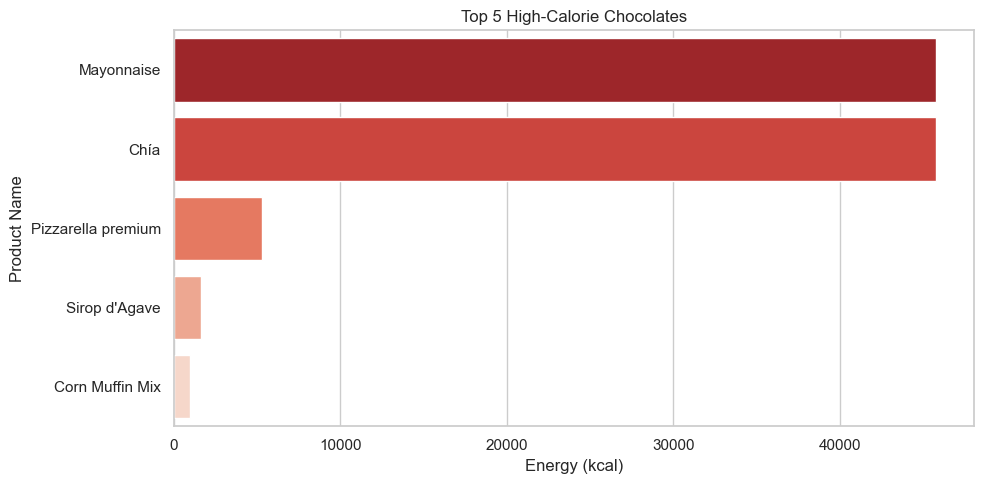

C:\Windows\Temp\ipykernel_12664\1203004182.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


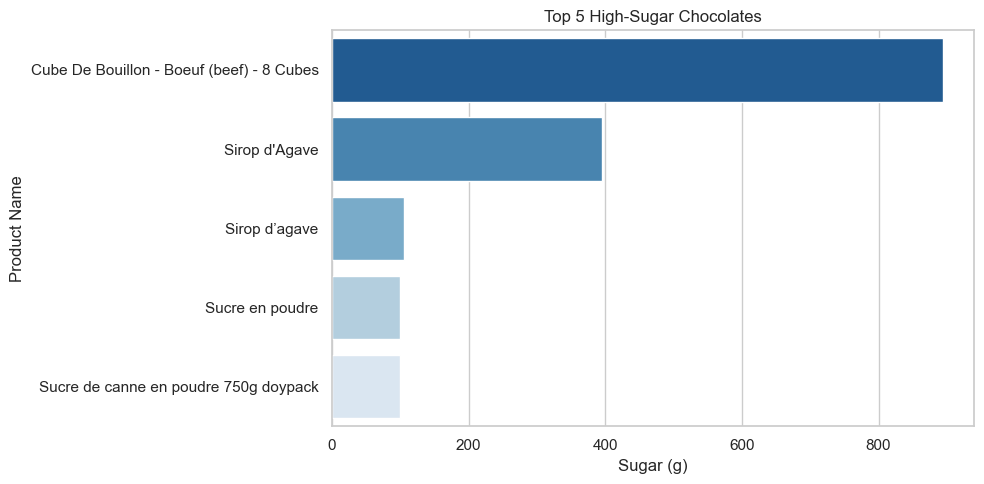

In [20]:
sns.set(style="whitegrid")

# Plot Top 5 High-Calorie Chocolates
plt.figure(figsize=(10,5))
sns.barplot(
    x='energy-kcal_value',
    y='product_name',
    data=energy_outliers_top,
    palette="Reds_r"
)
plt.title("Top 5 High-Calorie Chocolates")
plt.xlabel("Energy (kcal)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


# Plot Top 5 High-Sugar Chocolates
plt.figure(figsize=(10,5))
sns.barplot(
    x='sugars_value',
    y='product_name',
    data=sugar_outliers_top,
    palette="Blues_r"
)
plt.title("Top 5 High-Sugar Chocolates")
plt.xlabel("Sugar (g)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


In [21]:
### EDA

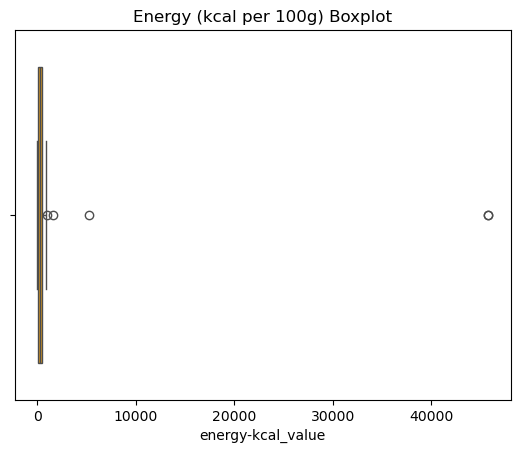

In [12]:
sns.boxplot(x=data['energy-kcal_value'], color='orange')
plt.title("Energy (kcal per 100g) Boxplot")
plt.show()

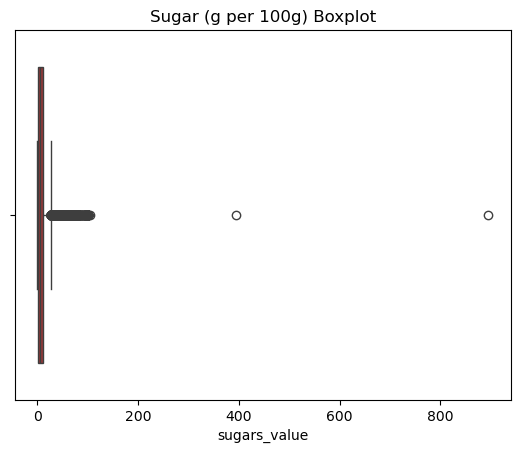

In [13]:
sns.boxplot(x=data['sugars_value'], color='brown')
plt.title("Sugar (g per 100g) Boxplot")
plt.show()

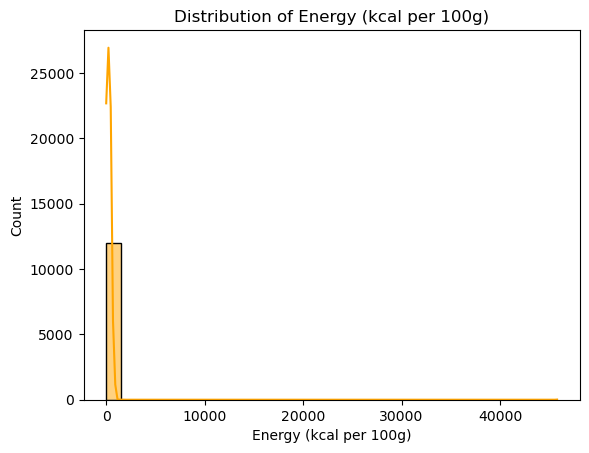

In [18]:
### Whether chocolates are calorie dense
sns.histplot(data['energy-kcal_value'], bins=30, kde=True, color="orange")
plt.title("Distribution of Energy (kcal per 100g)")
plt.xlabel("Energy (kcal per 100g)")
plt.show()

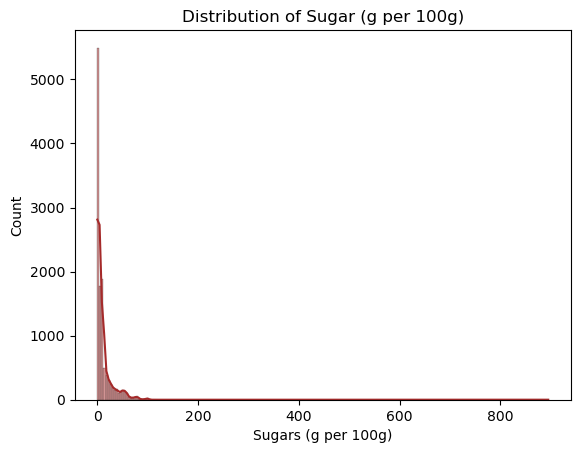

In [19]:
### How extreme sugar content is
sns.histplot(data['sugars_value'], kde=True, color="brown")
plt.title("Distribution of Sugar (g per 100g)")
plt.xlabel("Sugars (g per 100g)")
plt.show()

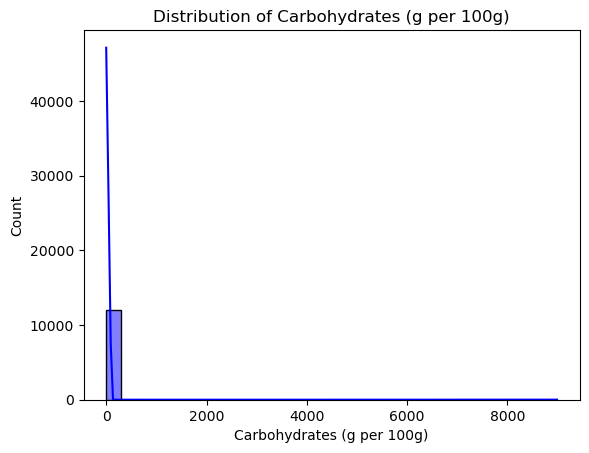

In [20]:
### The balance between sugar and carbs
sns.histplot(data['carbohydrates_value'], bins=30, kde=True, color="blue")
plt.title("Distribution of Carbohydrates (g per 100g)")
plt.xlabel("Carbohydrates (g per 100g)")
plt.show()

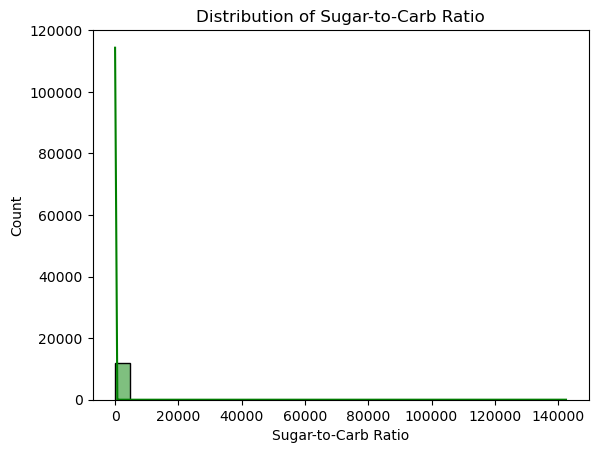

In [21]:
### The proportion of chocolates where sugar is the main carb source
sns.histplot(data['sugar_to_carb_ratio'], bins=30, kde=True, color="green")
plt.title("Distribution of Sugar-to-Carb Ratio")
plt.xlabel("Sugar-to-Carb Ratio")
plt.show()

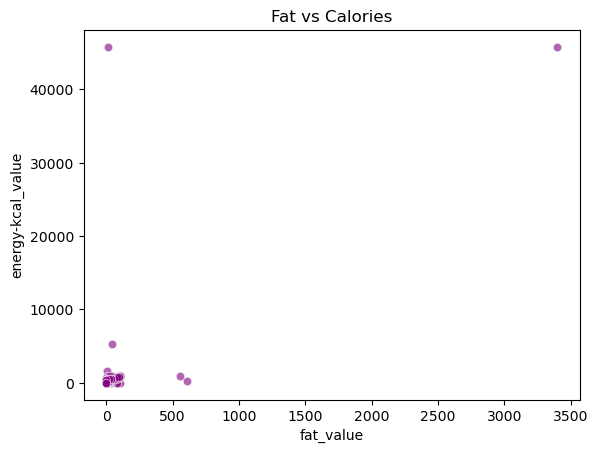

In [22]:
# Fat vs Calories
sns.scatterplot(x='fat_value', y='energy-kcal_value', data=data, alpha=0.6, color="purple")
plt.title("Fat vs Calories")
plt.show()

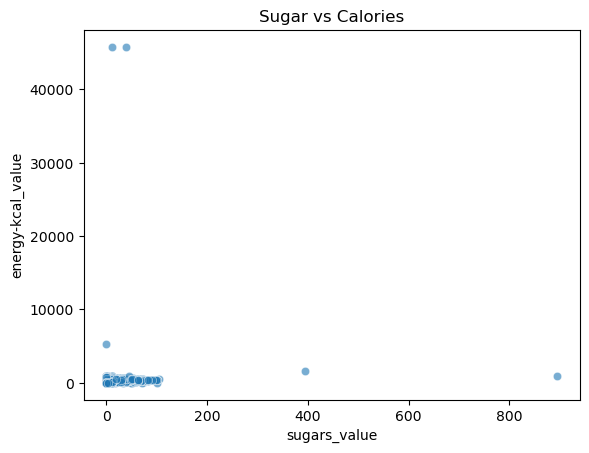

In [23]:
# Sugar vs Calories
sns.scatterplot(x='sugars_value', y='energy-kcal_value', data=data, alpha=0.6)
plt.title("Sugar vs Calories")
plt.show()

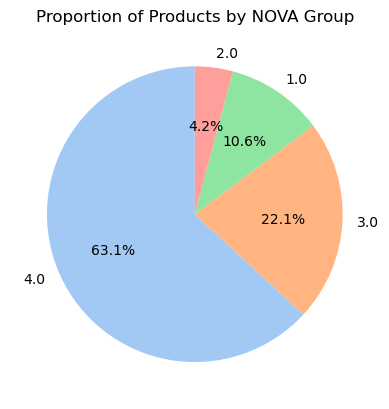

85% chocolates are ultra-processed (NOVA)


In [24]:
### How chocolates are spread across NOVA processing groups.
nova_counts = data['nova-group'].value_counts()
plt.pie(nova_counts, labels=nova_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Proportion of Products by NOVA Group")
plt.show()
print (f"85% chocolates are ultra-processed (NOVA)")

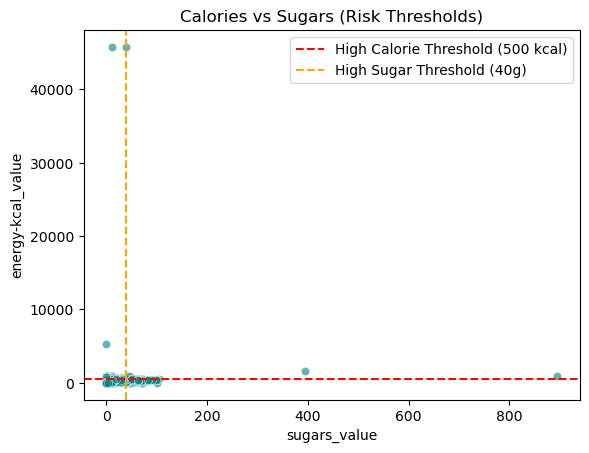

In [25]:
## Calories vs Sugars (High-Risk Zone)
sns.scatterplot(x='sugars_value', y='energy-kcal_value', data=data, alpha=0.6, color="teal")
plt.axhline(500, color='red', linestyle='--', label="High Calorie Threshold (500 kcal)")
plt.axvline(40, color='orange', linestyle='--', label="High Sugar Threshold (40g)")
plt.legend()
plt.title("Calories vs Sugars (Risk Thresholds)")
plt.show()

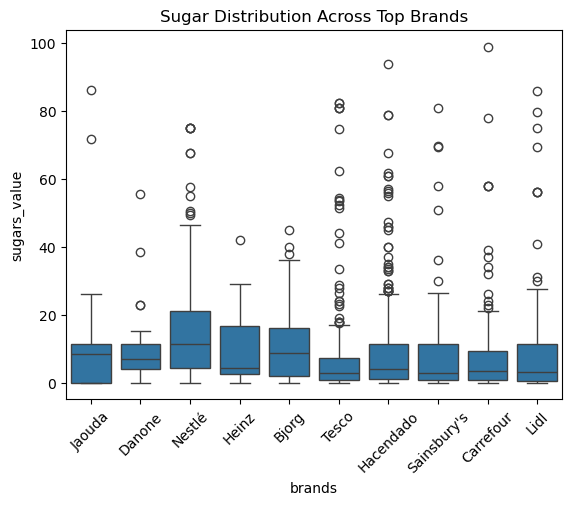

In [26]:
sns.boxplot(x='brands', y='sugars_value', data=data[data['brands'].isin(data['brands'].value_counts().head(10).index)])
plt.xticks(rotation=45)
plt.title("Sugar Distribution Across Top Brands")
plt.show()

C:\Windows\Temp\ipykernel_9744\4077128449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sugar_brands.index, y=top_sugar_brands.values, palette="Blues")


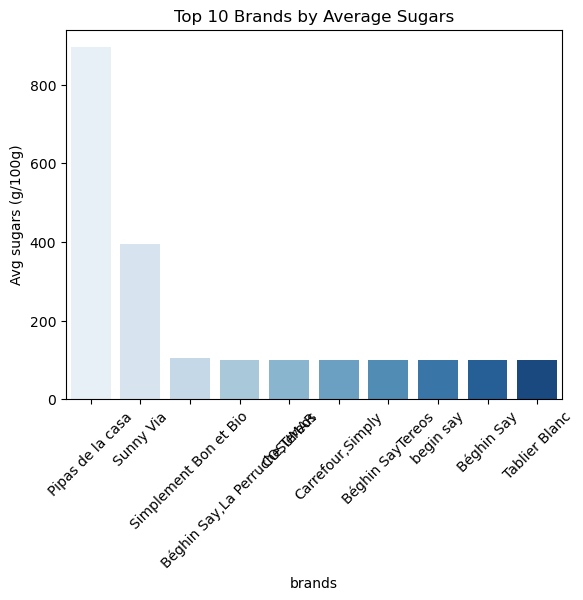

In [27]:
# Top brands by average sugars
top_sugar_brands = data.groupby('brands')['sugars_value'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_sugar_brands.index, y=top_sugar_brands.values, palette="Blues")
plt.xticks(rotation=45)
plt.title("Top 10 Brands by Average Sugars")
plt.ylabel("Avg sugars (g/100g)")
plt.show()

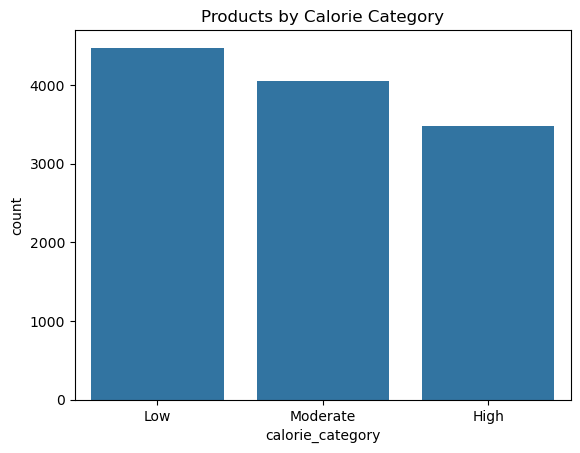

In [28]:
sns.countplot(x='calorie_category', data=data)
plt.title("Products by Calorie Category")
plt.show()


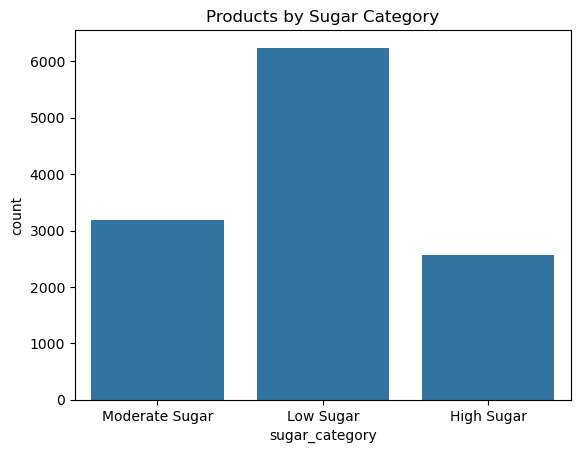

In [29]:

sns.countplot(x='sugar_category', data=data)
plt.title("Products by Sugar Category")
plt.show()

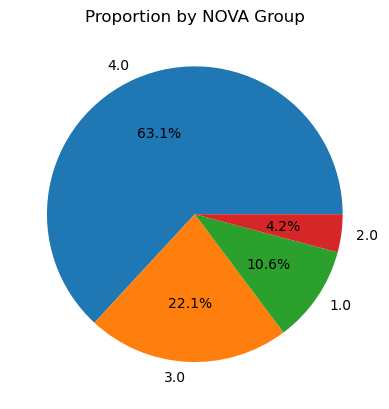

In [30]:
data['nova-group'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Proportion by NOVA Group")
plt.ylabel("")  # hide y-label
plt.show()

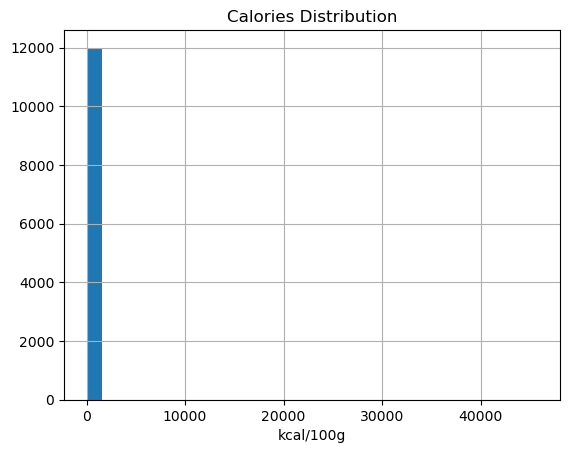

In [31]:
data['energy-kcal_value'].hist(bins=30)
plt.title("Calories Distribution")
plt.xlabel("kcal/100g")
plt.show()



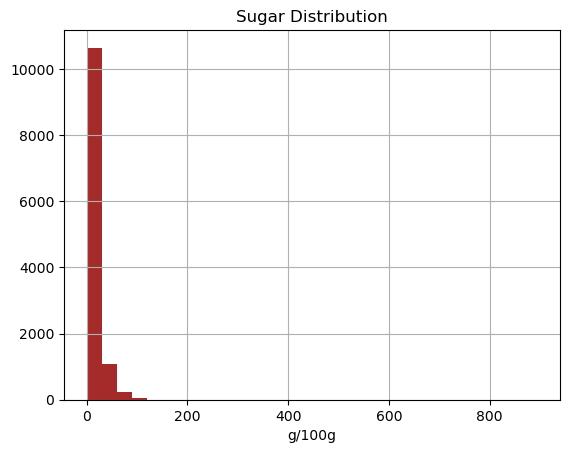

In [32]:
data['sugars_value'].hist(bins=30, color="brown")
plt.title("Sugar Distribution")
plt.xlabel("g/100g")
plt.show()


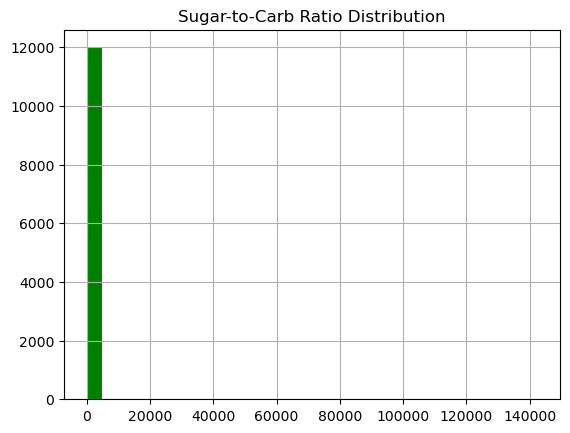

In [33]:
data['sugar_to_carb_ratio'].hist(bins=30, color="green")
plt.title("Sugar-to-Carb Ratio Distribution")
plt.show()

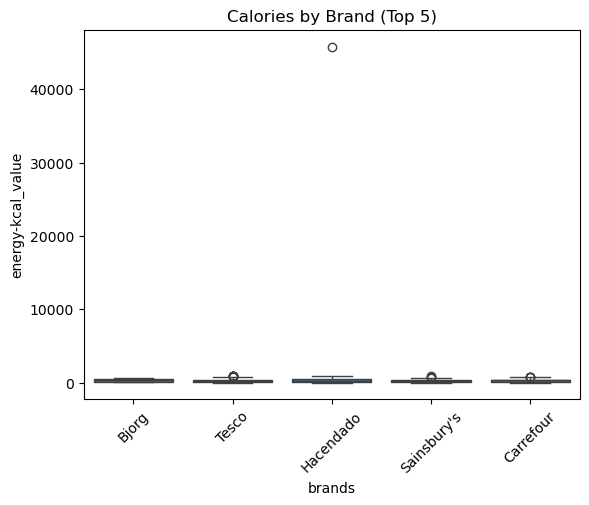

In [34]:
# 4. Box plots - calories and sugar across top brands
top_brands = data['brands'].value_counts().head(5).index  # top 5 brands only
sns.boxplot(x='brands', y='energy-kcal_value', data=data[data['brands'].isin(top_brands)])
plt.title("Calories by Brand (Top 5)")
plt.xticks(rotation=45)
plt.show()

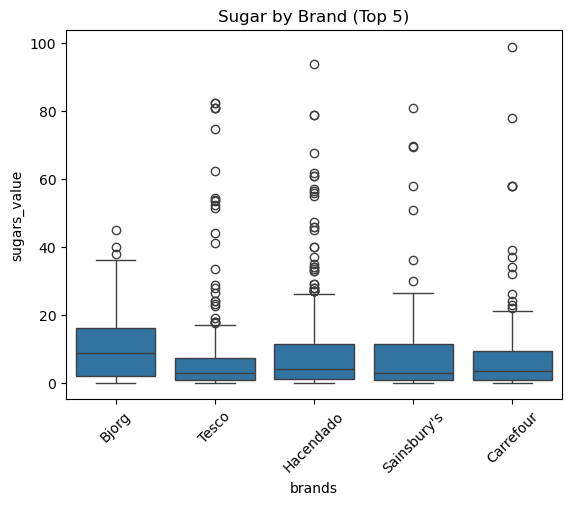

In [35]:
sns.boxplot(x='brands', y='sugars_value', data=data[data['brands'].isin(top_brands)])
plt.title("Sugar by Brand (Top 5)")
plt.xticks(rotation=45)
plt.show()

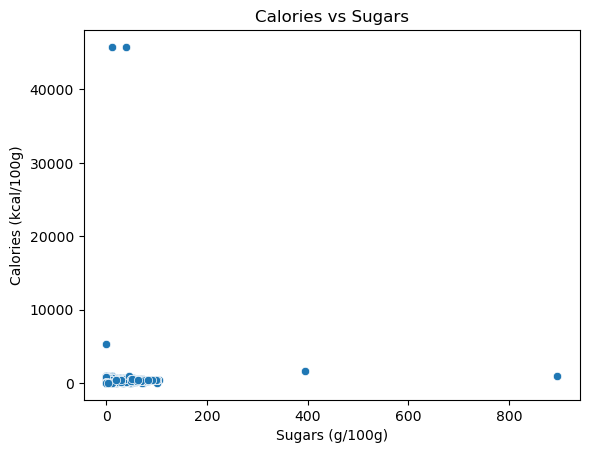

In [36]:
# 5. Scatter plot - calories vs sugars
sns.scatterplot(x='sugars_value', y='energy-kcal_value', data=data)
plt.title("Calories vs Sugars")
plt.xlabel("Sugars (g/100g)")
plt.ylabel("Calories (kcal/100g)")
plt.show()

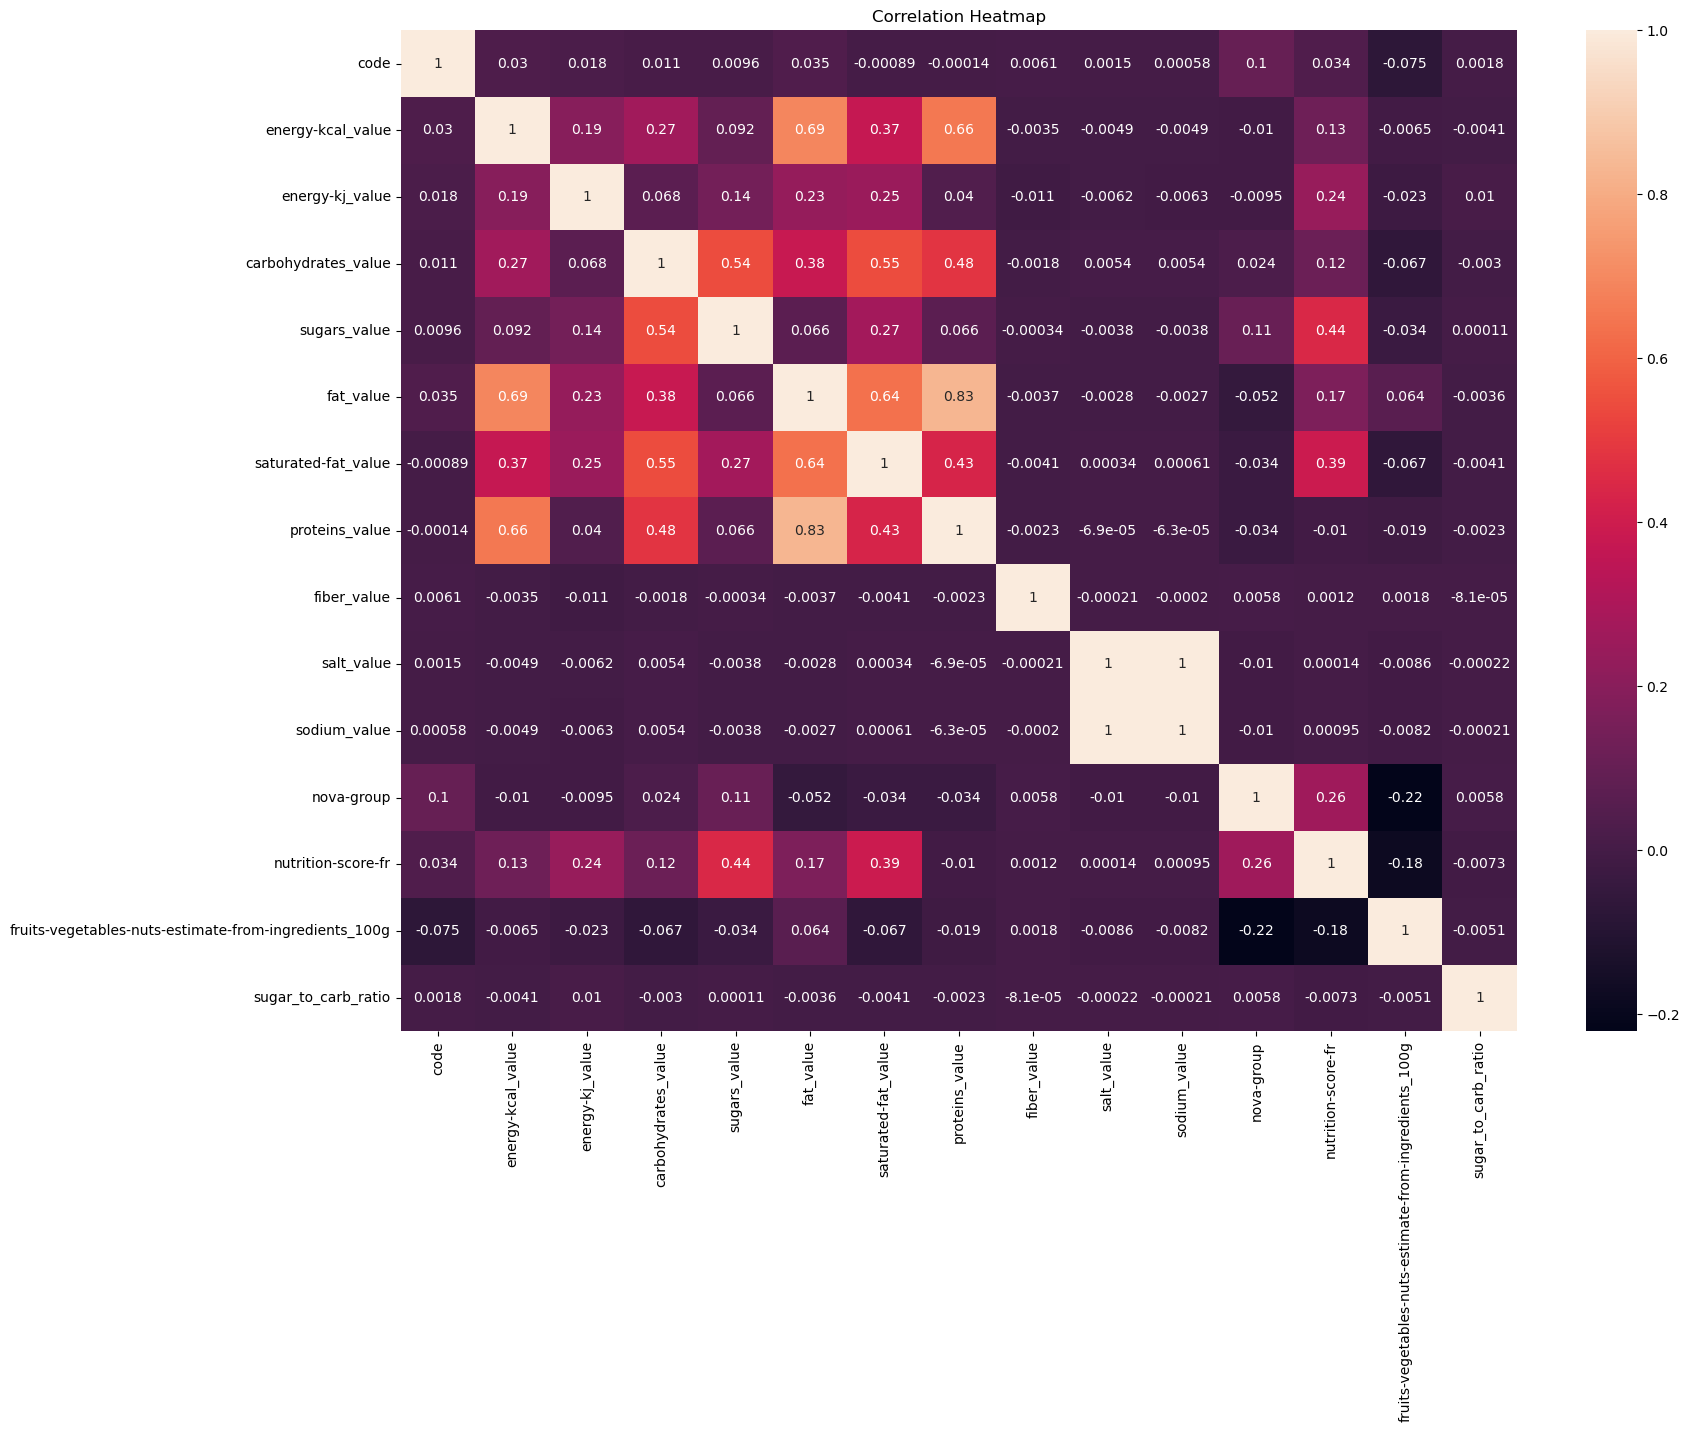

In [37]:
# 6. Heatmap - correlation between numbers
num_cols = data.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(18,13))
sns.heatmap(num_cols.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


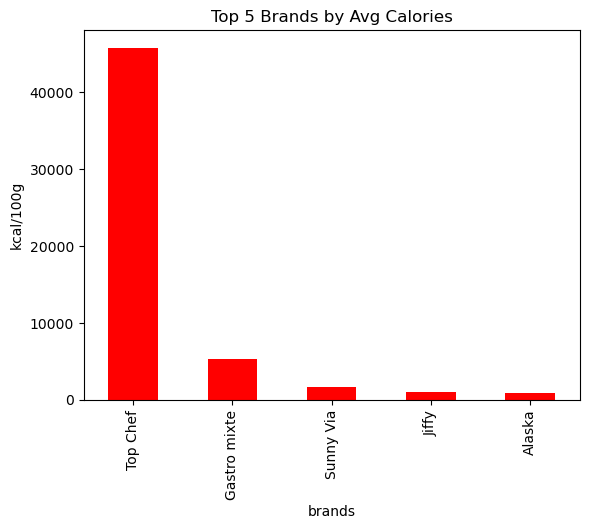

In [38]:
# 7. Top brands by average calories and sugars
data.groupby('brands')['energy-kcal_value'].mean().sort_values(ascending=False).head(5).plot(kind='bar', color="red")
plt.title("Top 5 Brands by Avg Calories")
plt.ylabel("kcal/100g")
plt.show()



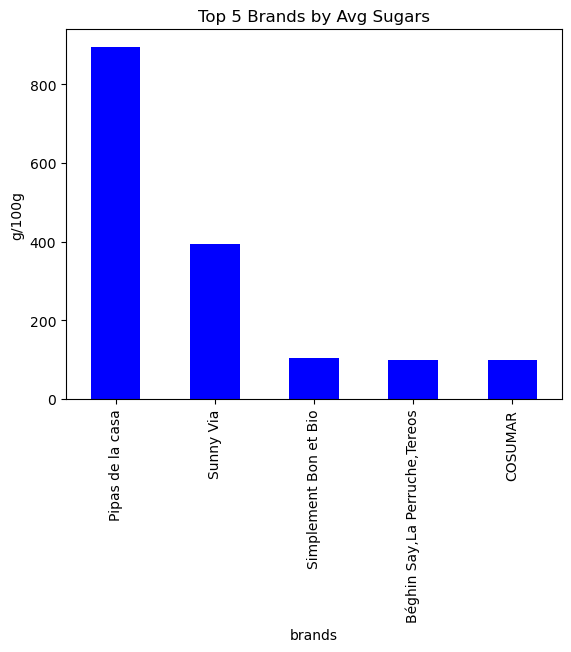

In [39]:
data.groupby('brands')['sugars_value'].mean().sort_values(ascending=False).head(5).plot(kind='bar', color="blue")
plt.title("Top 5 Brands by Avg Sugars")
plt.ylabel("g/100g")
plt.show()